In [15]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [3]:
xData = [1,2,3,4,5,6,7]
yData = [25000,55000,75000, 110000, 128000, 155000, 180000]

In [4]:
W = tf.Variable(tf.random.uniform([1], -100, 100))
b = tf.Variable(tf.random.uniform([1], -100, 100))
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
H = W * X + b
cost = tf.reduce_mean(tf.square(H-Y))
a = tf.Variable(0.01)

In [5]:
optimizer = tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost)
init = tf.global_variables_initializer()

In [6]:
sess = tf.Session()
sess.run(init)

In [7]:
for i in range(5001):
    sess.run(train, feed_dict={X: xData, Y: yData})
    if i % 500 == 0:
        print(i, sess.run(cost, feed_dict={X: xData, Y: yData}), sess.run(W), sess.run(b))

0 4618997000.0 [10315.211] [2153.5293]
500 8689891.0 [25534.844] [1963.4443]
1000 8633868.0 [25627.117] [1506.5176]
1500 8632682.0 [25640.564] [1439.9324]
2000 8632654.0 [25642.523] [1430.2268]
2500 8632651.0 [25642.805] [1428.8251]
3000 8632657.0 [25642.844] [1428.6345]
3500 8632657.0 [25642.848] [1428.6133]
4000 8632657.0 [25642.848] [1428.6133]
4500 8632657.0 [25642.848] [1428.6133]
5000 8632657.0 [25642.848] [1428.6133]


In [8]:
print(sess.run(H, feed_dict={X: [8]}))

[206571.39]


In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [10]:
xData.append(8)
yData.append(206571.39)
df = pd.DataFrame({'time': xData, 'price': yData})
print(df)

   time      price
0     1   25000.00
1     2   55000.00
2     3   75000.00
3     4  110000.00
4     5  128000.00
5     6  155000.00
6     7  180000.00
7     8  206571.39


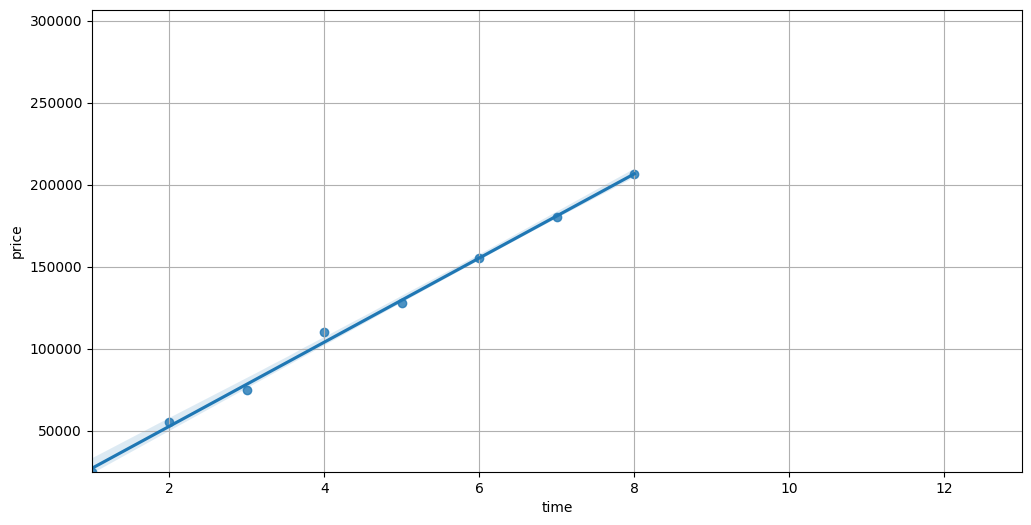

In [11]:
plt.rcParams["figure.figsize"] = (12,6)
sns.regplot(x='time', y='price', data=df)
plt.xlim(df['time'].min(), df['time'].max()+5)
plt.ylim(df['price'].min(), df['price'].max()+100000)
plt.grid()
plt.show()

In [12]:
import numpy as np
from statsmodels.formula.api import ols
z=np.polyfit(df['time'], df['price'], 1) # 기울기와 절편 확인
f=np.poly1d(z) # f(x): f함수에 x값을 넣으면 y값을 계산해 줌
print(z[0], z[1])
print(f(1))

25642.853928571432 1428.5810714285542
27071.434999999987


In [13]:
#statsmodel을 통해 회귀식의 회귀계수(기울기, 절편) 확인
ols('price ~ time', data=df).fit().summary()

c:\Python310\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2742.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           3.25e-09
Time:                        16:58:40   Log-Likelihood:                -74.702
No. Observations:                   8   AIC:                             153.4
Df Residuals:                       6   BIC:                             153.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1428.5811   2472.811      0.578      0.584   -4622.170    7479.332
time        2.564e+04    489.690     52.366      0.000    2.44e+04    2.68e+04
==============================================================================
Omnibus:                        4.695   Durbin-Watson:                   3.308
Prob(Omnibus):                  0.096   Jarque-Bera (JB):                1.515
Skew:                           1.059   Prob(JB):                        0.469
Kurtosis:                       3.235   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

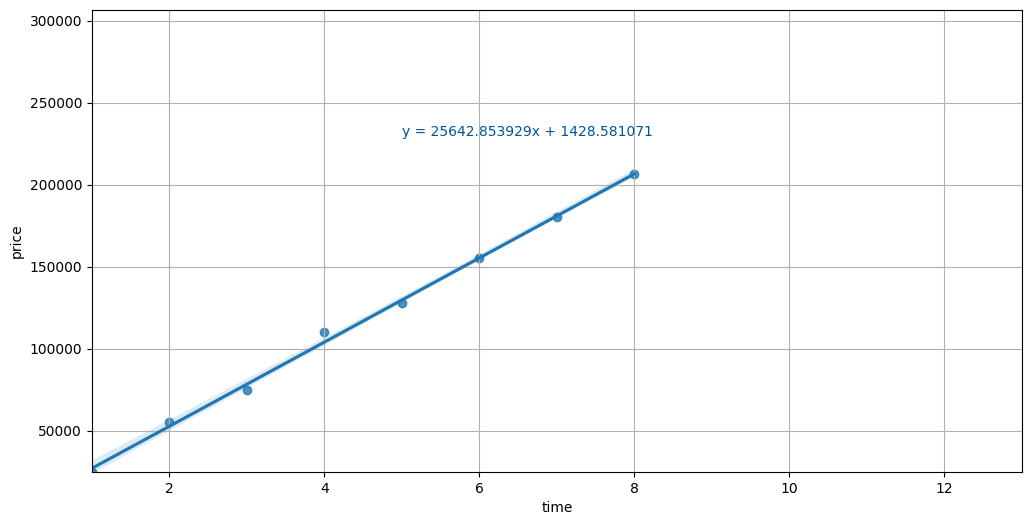

In [14]:
plt.rcParams["figure.figsize"] = (12,6)
sns.regplot(x='time', y='price', data=df)
plt.xlim(df['time'].min(), df['time'].max()+5)
plt.ylim(df['price'].min(), df['price'].max()+100000)
plt.text(5, 230000, "y = %fx + %f" %(z[0], z[1]), color="#005599")
plt.grid()
plt.show()